# Import Required Libraries

In [1]:
# Main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
    OneHotEncoder,
)
from sklearn.compose import ColumnTransformer
from scipy.stats import uniform

# Model selection
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Performance metrics
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
from scipy.stats import f_oneway, tukey_hsd

# Perform a Quick Overview of the Dataset

In [2]:
# Import the dataset to a dataframe
employee_df = pd.read_csv("Human_Resources.csv")

In [3]:
# Examine the dataset
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
employee_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
# Replace "Attrition", "OverTime", and "Over18" columns with numerical binary values

employee_df["Attrition"] = employee_df["Attrition"].apply(lambda x:1 if x == "Yes" else 0)
employee_df["OverTime"] = employee_df["OverTime"].apply(lambda x:1 if x == "Yes" else 0)
employee_df["Over18"] = employee_df["Over18"].apply(lambda x:1 if x == "Y" else 0)

In [7]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<Axes: >

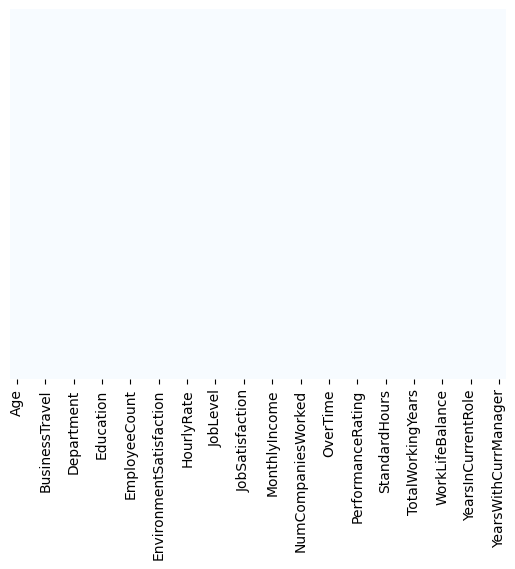

In [8]:
# Check for missing data
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

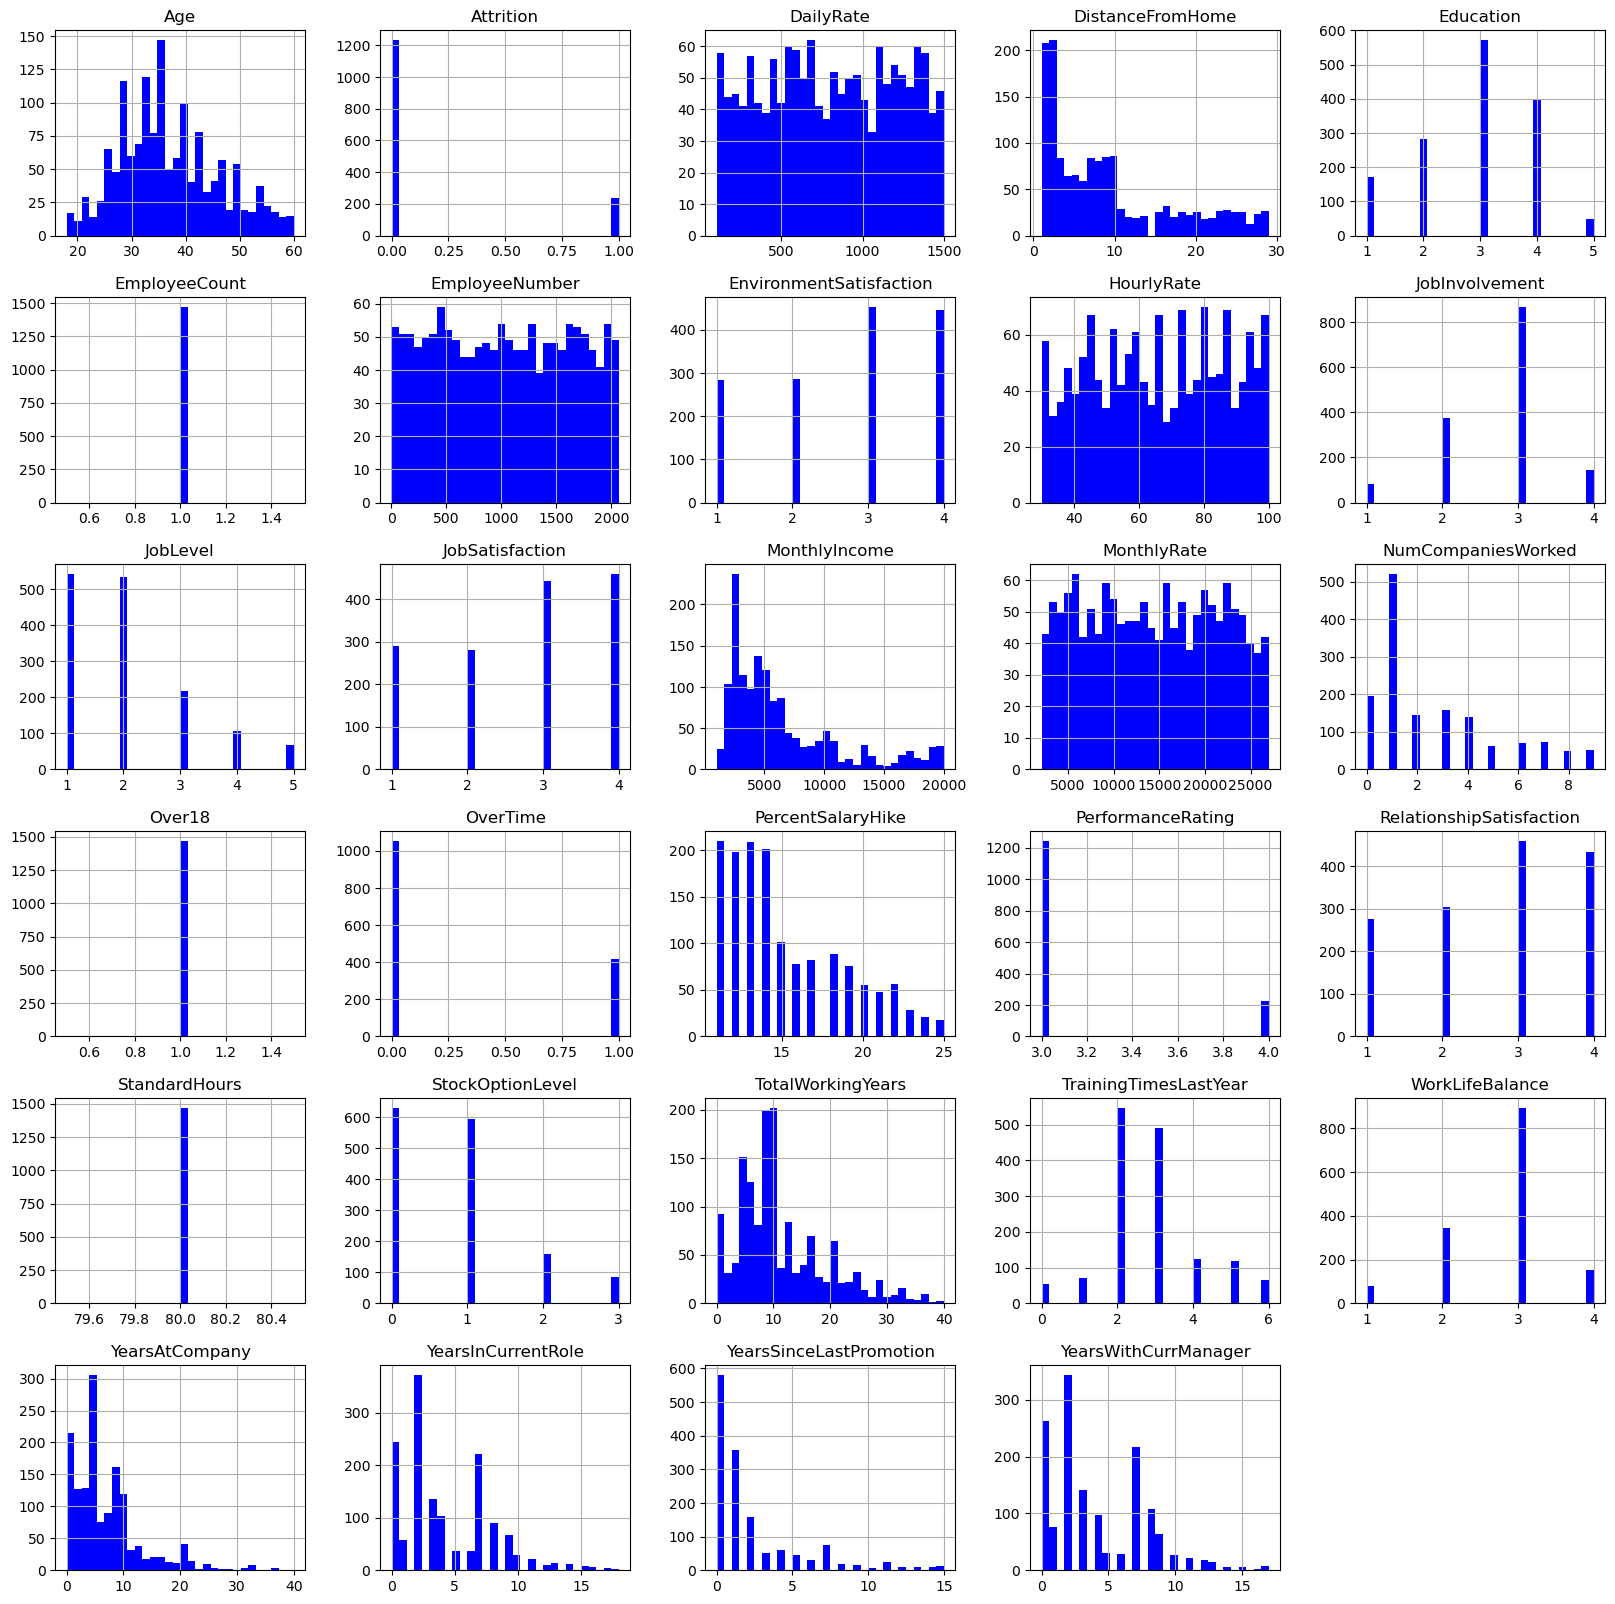

In [9]:
# Visualize the distribution of numerical features
employee_df.hist(bins=30, figsize=(20, 20), color='b')

In [10]:
# Drop "EmployeeCount", "StandardHours", "Over18", and "EmployeeNumber" as they do not have meaningful information

employee_df.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis=1, inplace=True)
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Create a Test Set

In [11]:
# Create train and test sets that sample classes in "Attrition" eqaully

train_set, test_set = train_test_split(employee_df, test_size=0.15, stratify=employee_df["Attrition"], random_state=2023)
train_set.shape

(1249, 31)

In [12]:
test_set.shape

(221, 31)

# Perform Indepth Visualizations

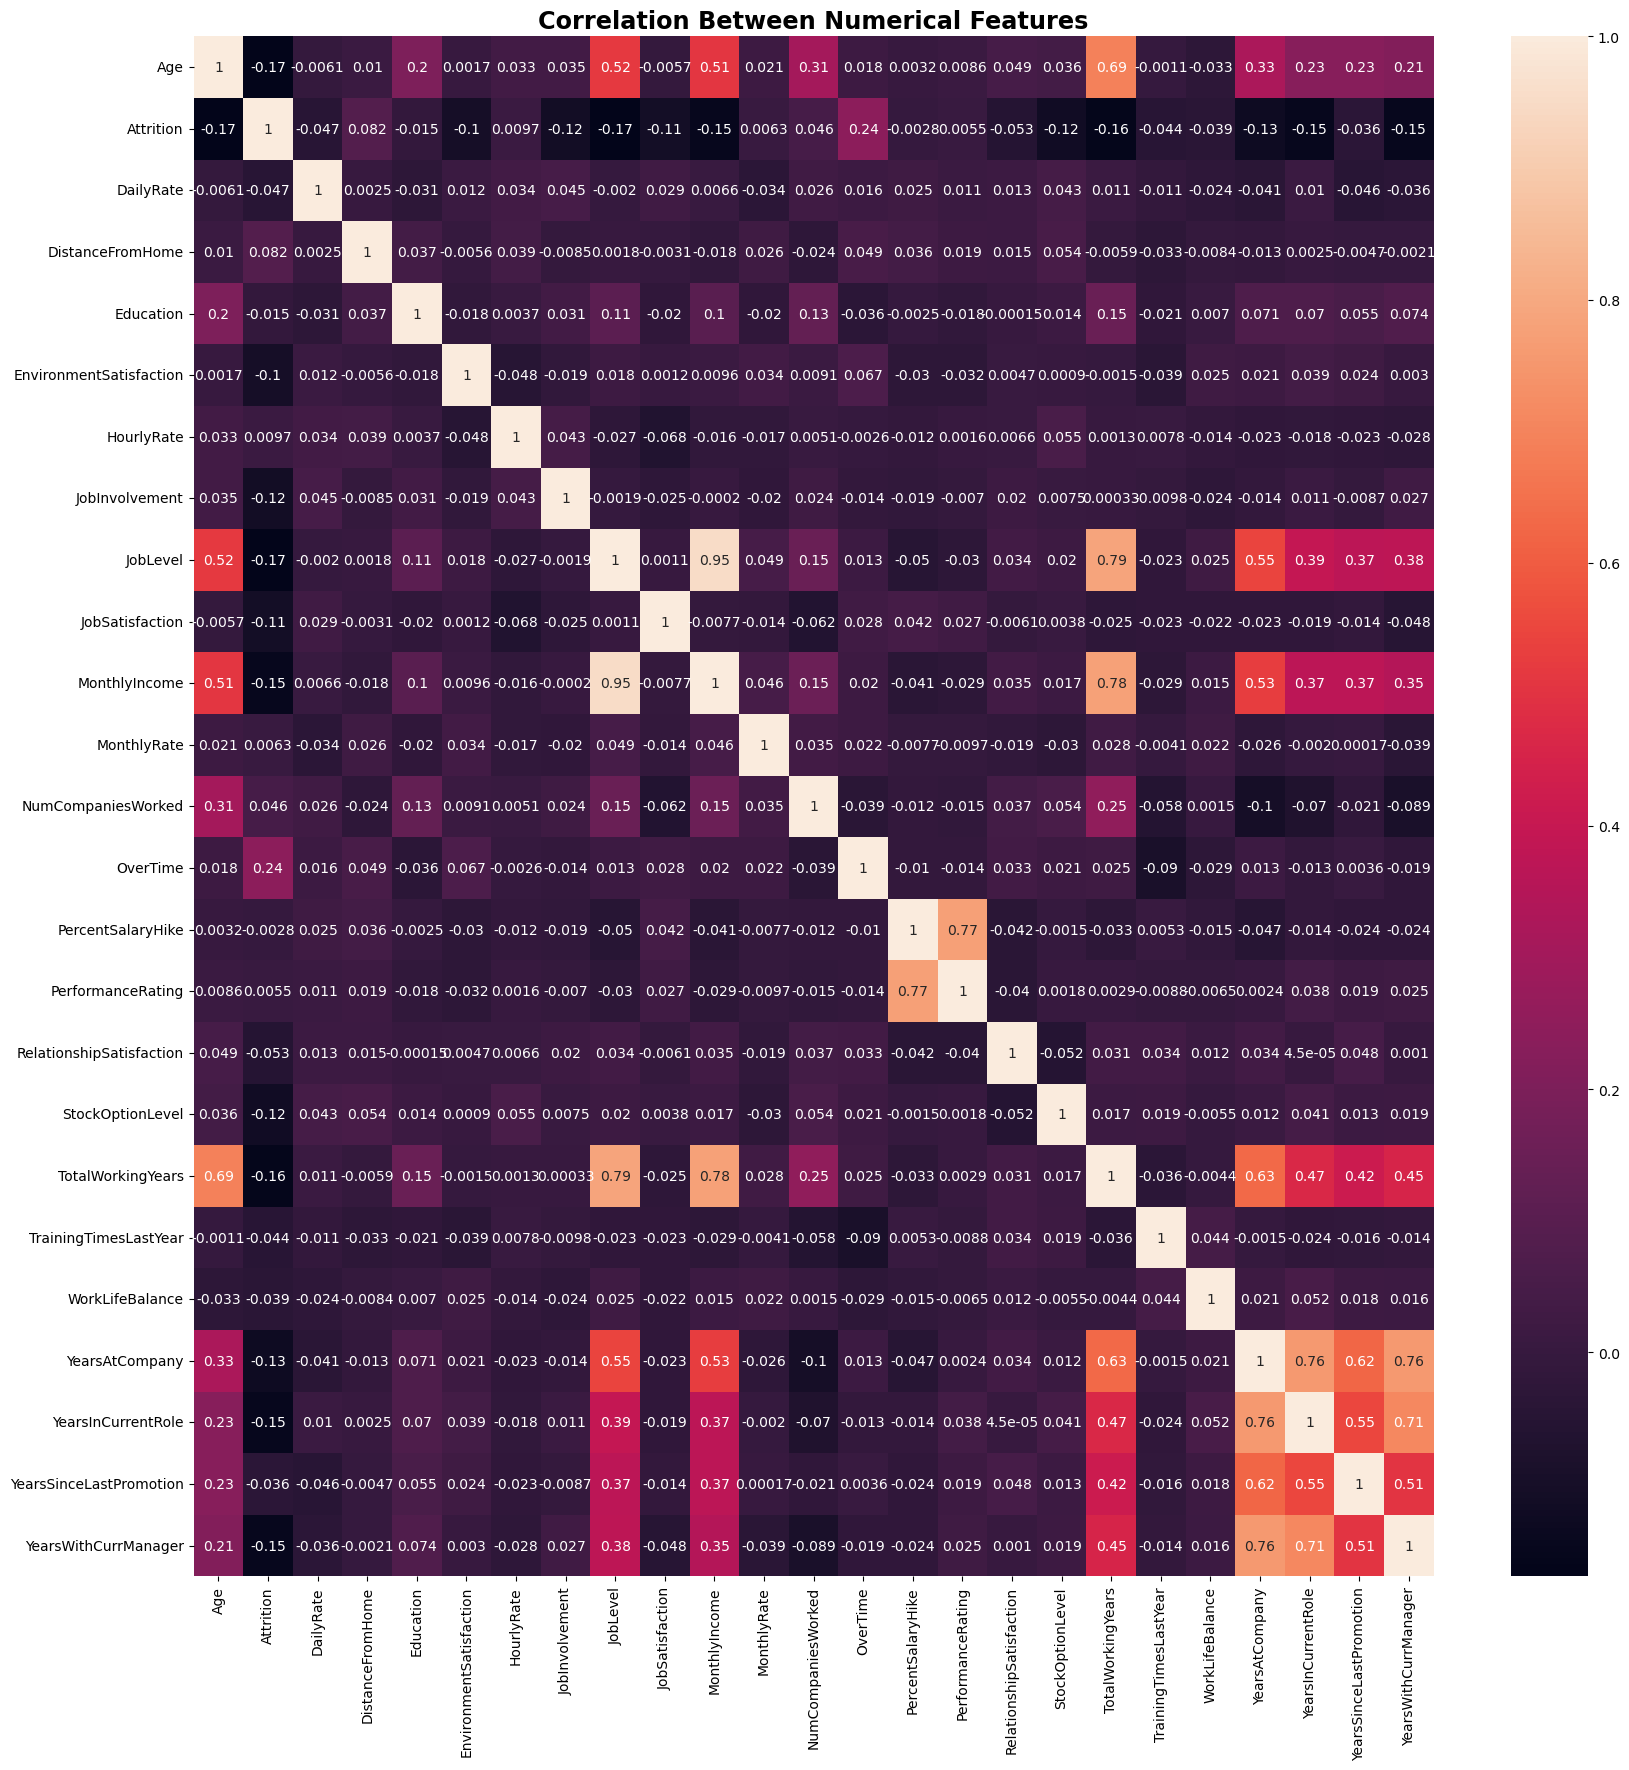

In [16]:
# Analyze correlations between different features

correlations = train_set.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)
plt.title("Correlation Between Numerical Features", fontsize='xx-large', fontweight='bold')

plt.savefig("files/correlation_plot.png")

<Axes: xlabel='Age', ylabel='proportion'>

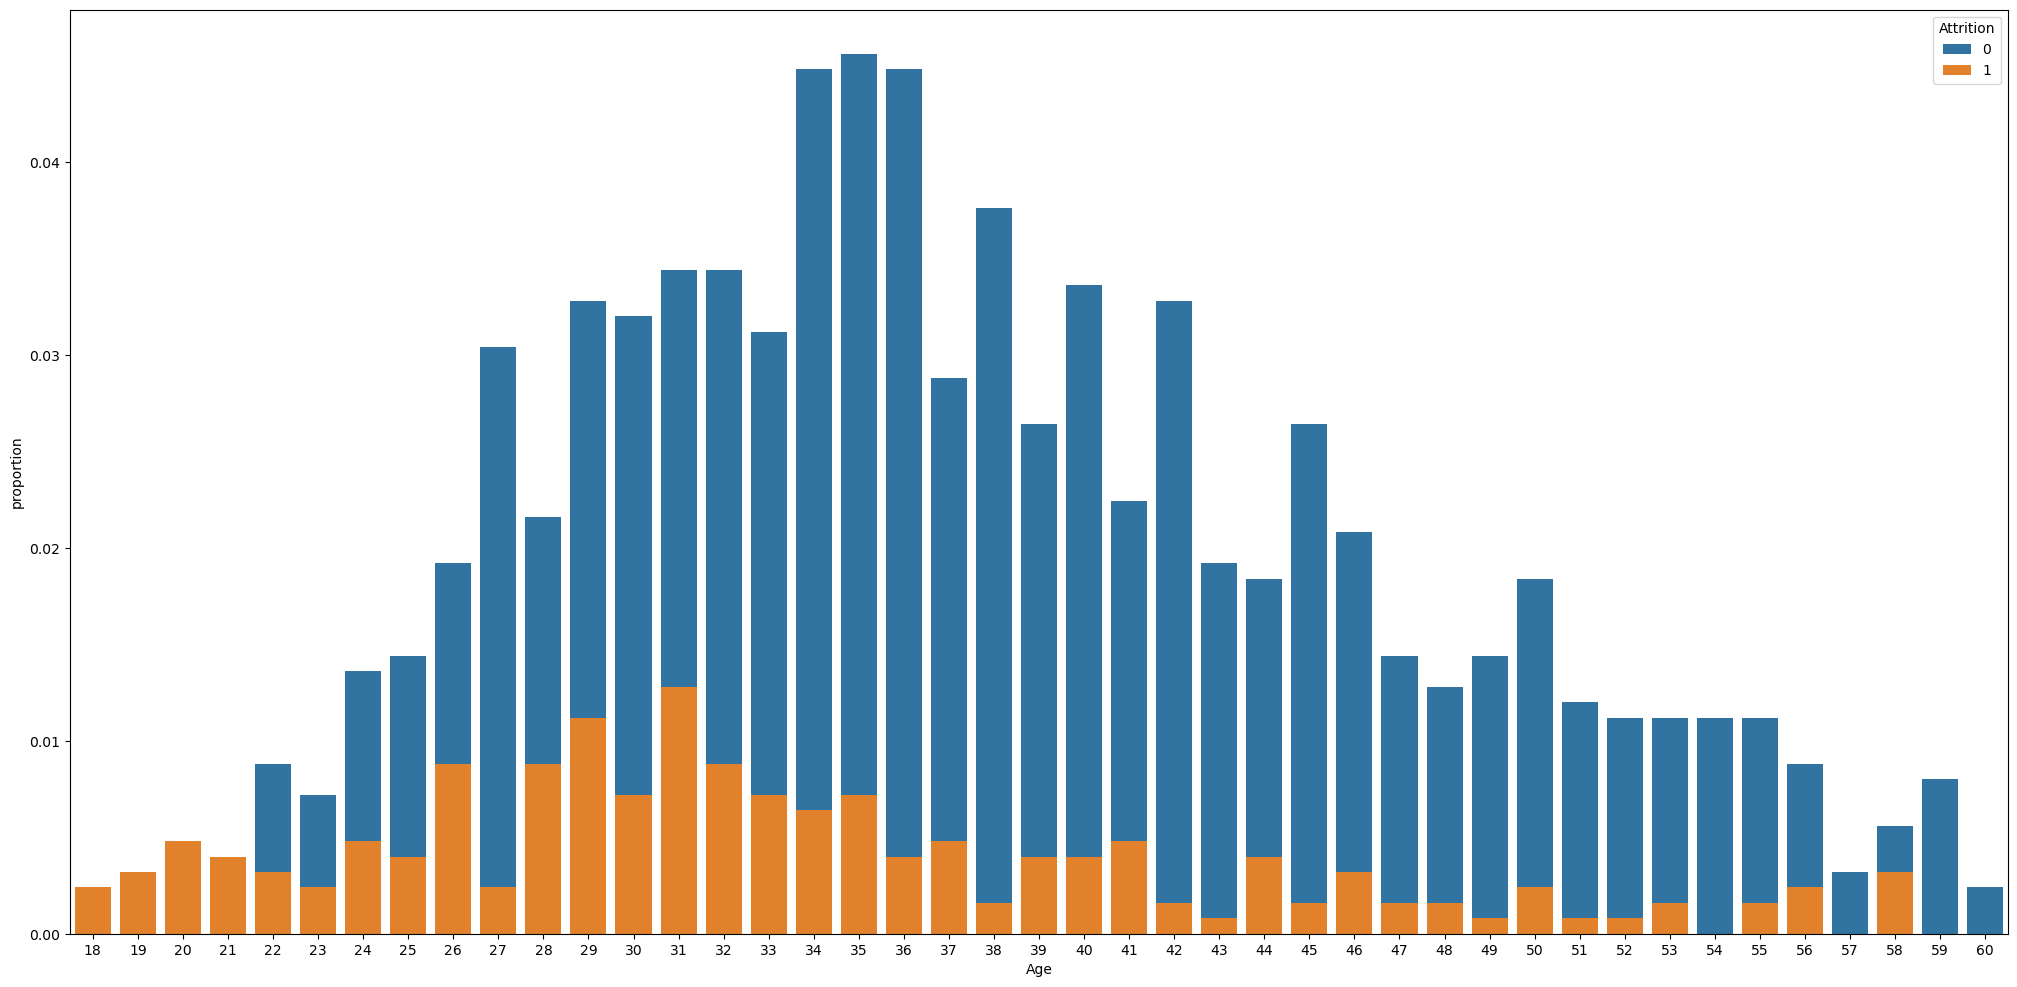

In [17]:
# Show the proportion of employees who left and who stayed according to age

plt.figure(figsize=[25, 12])
sns.countplot(train_set, x="Age", hue="Attrition", stat="proportion", dodge=False)

<Axes: xlabel='JobLevel', ylabel='proportion'>

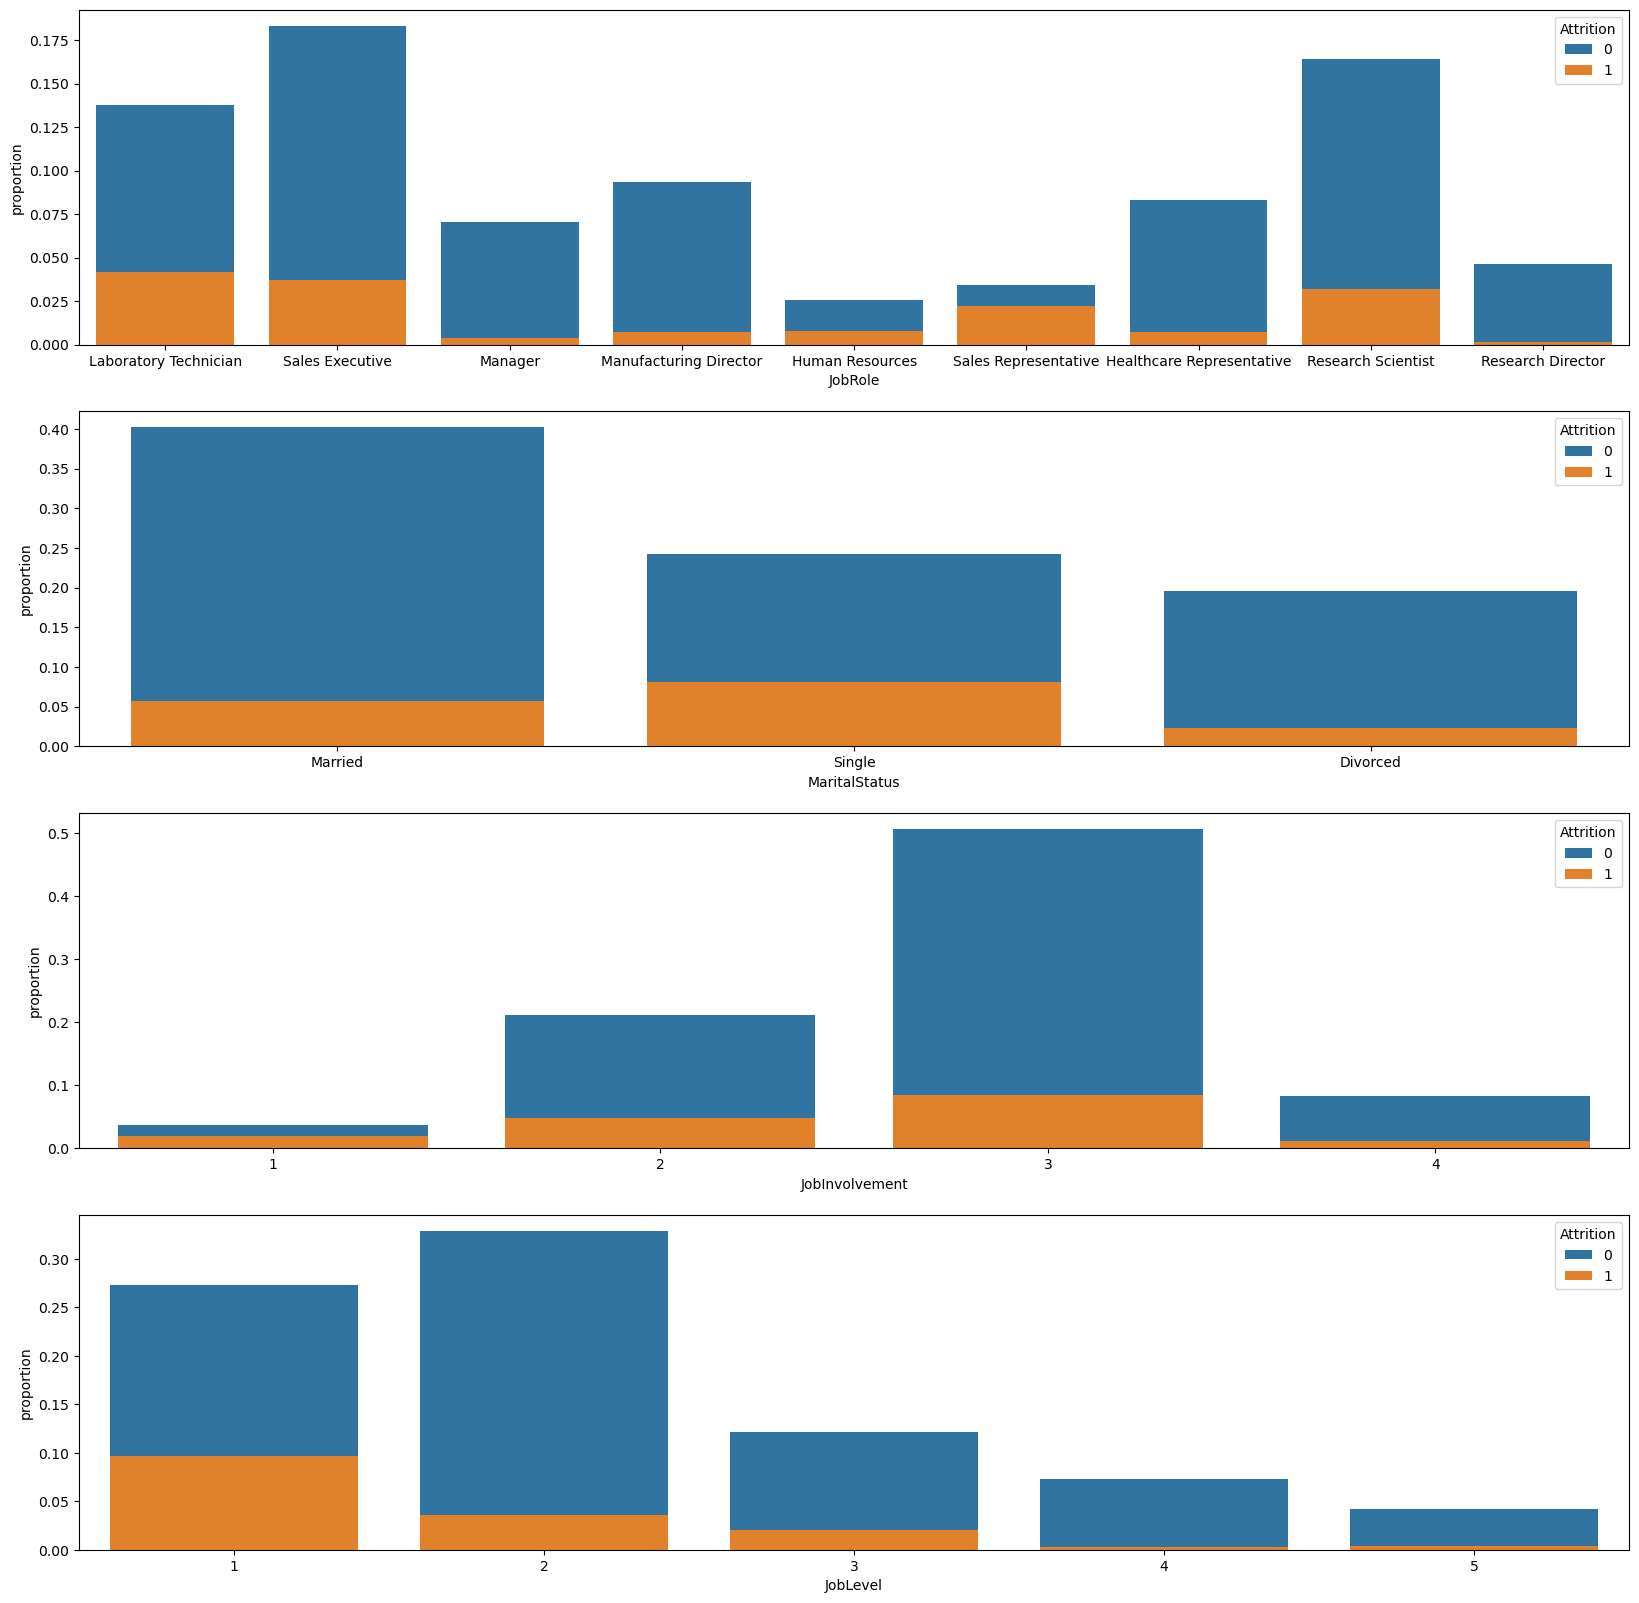

In [18]:
# Show the proportion of employees who left and who stayed according to JobRole, MaritalStatus, JobInvolvement and JobLevel

plt.figure(figsize=[20, 20])

plt.subplot(411)
sns.countplot(train_set, x="JobRole", hue="Attrition", stat="proportion", dodge=False)

plt.subplot(412)
sns.countplot(train_set, x="MaritalStatus", hue="Attrition", stat="proportion", dodge=False)

plt.subplot(413)
sns.countplot(train_set, x="JobInvolvement", hue="Attrition", stat="proportion", dodge=False)

plt.subplot(414)
sns.countplot(train_set, x="JobLevel", hue="Attrition", stat="proportion", dodge=False)

In [19]:
# Separate employees who left from those who stayed to highlight some visualizations

left_df = train_set[train_set["Attrition"] == 1]
stayed_df = train_set[train_set["Attrition"] == 0]

print(f"% of employees who left:", len(left_df)/len(train_set) * 100, "%")

print(f"% of employees who stayed:", len(stayed_df)/len(train_set) * 100, "%")

% of employees who left: 16.09287429943955 %
% of employees who stayed: 83.90712570056044 %


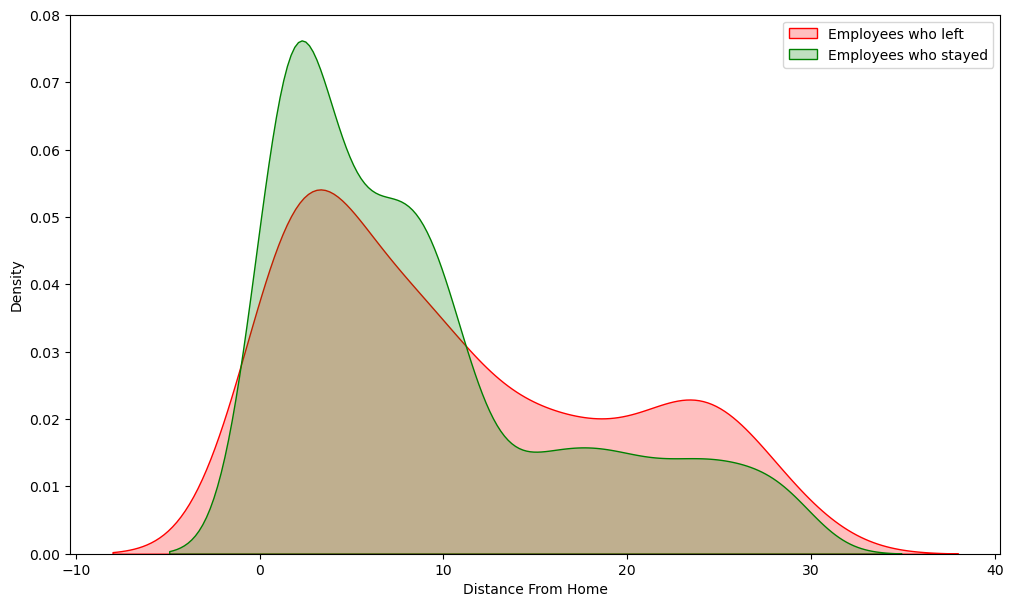

In [20]:
# Generate kernel density estimate (KDE) plots

plt.figure(figsize=(12, 7))

sns.kdeplot(left_df["DistanceFromHome"], label="Employees who left", fill=True, color="r")
sns.kdeplot(stayed_df["DistanceFromHome"], label="Employees who stayed", fill=True, color="g")

plt.xlabel("Distance From Home")
plt.legend()

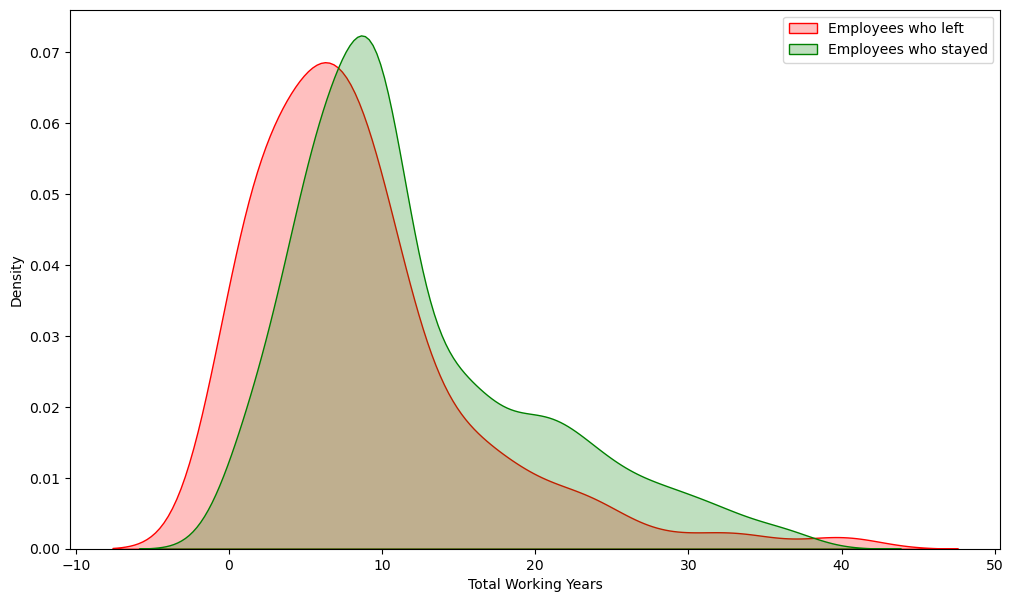

In [21]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df["TotalWorkingYears"], label="Employees who left", fill=True, color="r")
sns.kdeplot(stayed_df["TotalWorkingYears"], label="Employees who stayed", fill=True, color="g")

plt.xlabel("Total Working Years")
plt.legend()

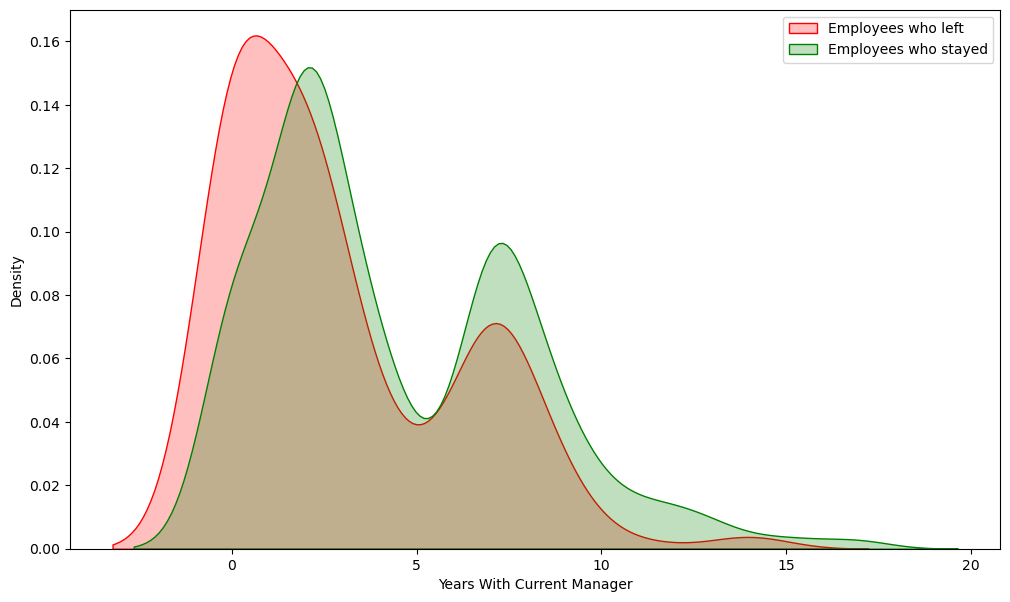

In [22]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df["YearsWithCurrManager"], label="Employees who left", fill=True, color="r")
sns.kdeplot(stayed_df["YearsWithCurrManager"], label="Employees who stayed", fill=True, color="g")

plt.xlabel("Years With Current Manager")
plt.legend()

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

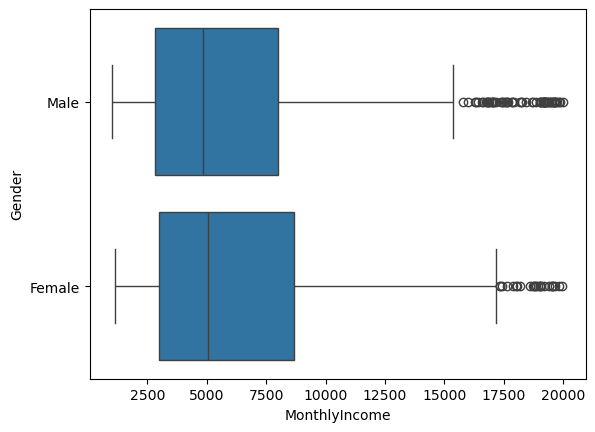

In [23]:
# Visualize income distribution according to gender

sns.boxplot(train_set, x="MonthlyIncome", y="Gender")

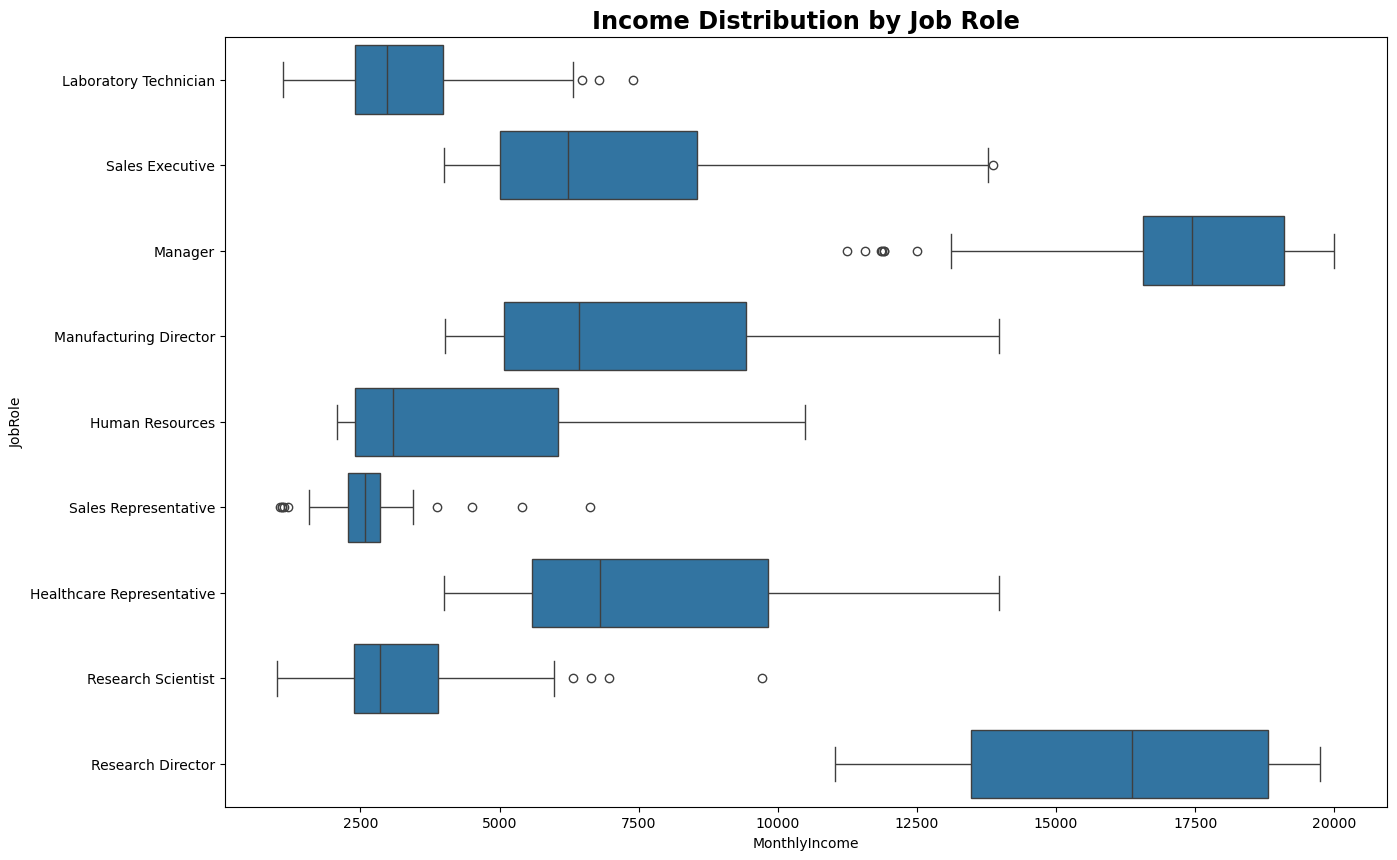

In [24]:
# Visualize income distribution according to job role

plt.figure(figsize=(15, 10))
sns.boxplot(train_set, x="MonthlyIncome", y="JobRole")
plt.title("Income Distribution by Job Role", fontsize='xx-large', fontweight='bold')

plt.savefig("files/Income Distribution by Job Role.png")

# Create a Data Preprocessing Pipeline

In [25]:
# Create a pipeline to transform and scale numerical features

num_pipeline = Pipeline([
    ('transformer', PowerTransformer()),
    ('std_scaler', StandardScaler()),
    ('minmax_scaler', MinMaxScaler()),
])

In [26]:
numerical_cols = ["Age", "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction", "HourlyRate",
                  "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
                  "OverTime", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel",
                  "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole",
                  "YearsSinceLastPromotion", "YearsWithCurrManager"]
train_num = train_set[numerical_cols]

y_train = train_set["Attrition"]

In [27]:
train_num_tr = num_pipeline.fit_transform(train_num)
train_num_tr

array([[0.51501107, 0.52095121, 0.25217486, ..., 0.        , 0.        ,
        0.        ],
       [0.49070073, 0.18100279, 1.        , ..., 0.62631279, 0.87342853,
        0.64212964],
       [0.41439462, 0.70310516, 0.4008848 , ..., 0.29013141, 0.        ,
        0.29704918],
       ...,
       [0.44042237, 0.25446763, 0.84772512, ..., 0.38029924, 0.        ,
        0.29704918],
       [0.44042237, 0.43397757, 0.55048491, ..., 0.62631279, 0.        ,
        0.6896484 ],
       [0.53880487, 0.76688183, 0.93141557, ..., 0.67254545, 0.        ,
        0.6896484 ]])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>],
       [<Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
      

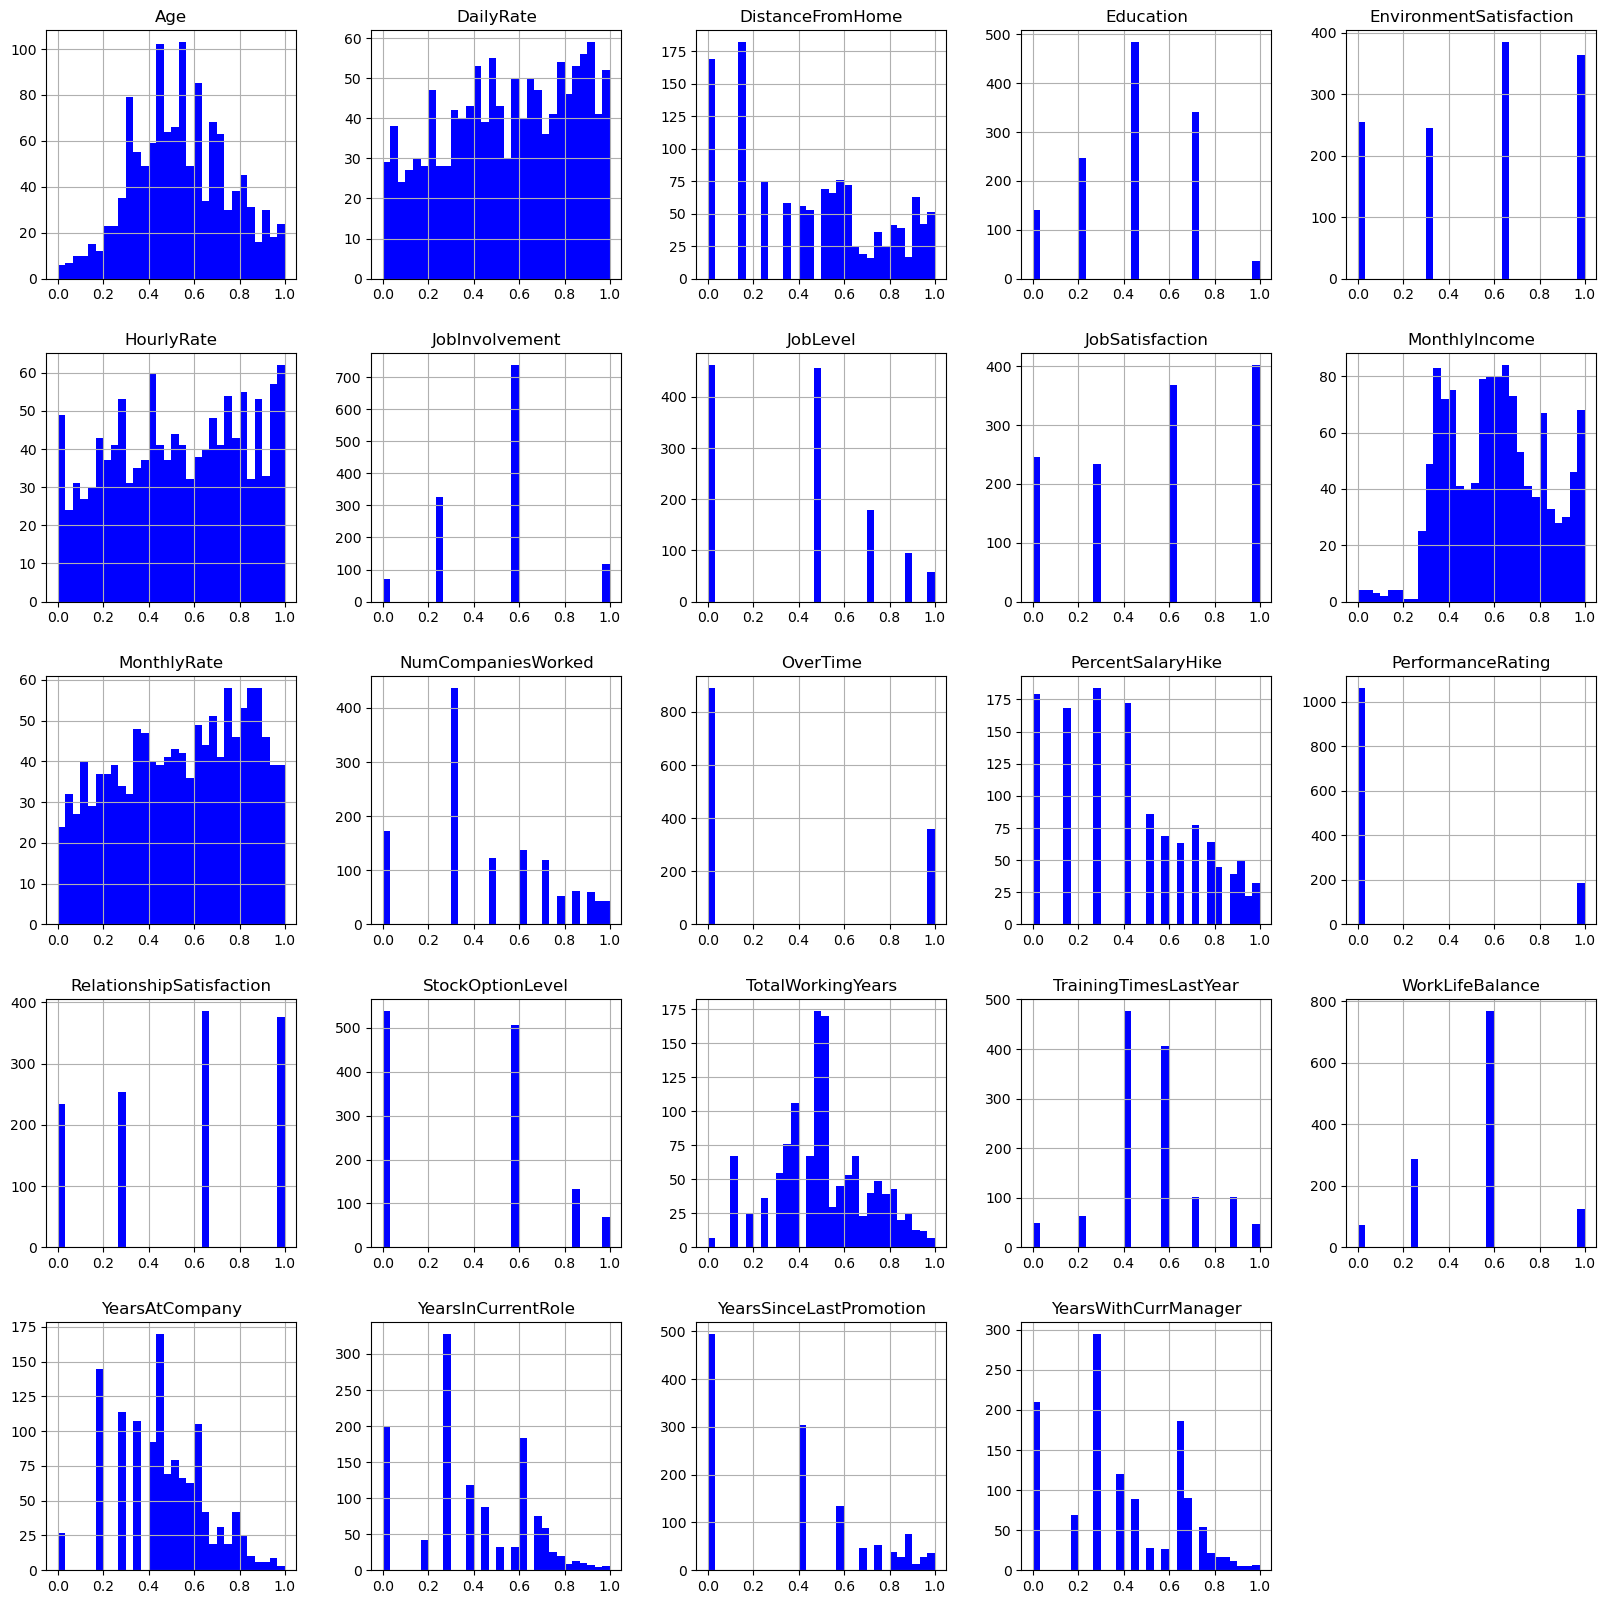

In [28]:
# Visualize the distribution of the transformed features

train_num_tr_df = pd.DataFrame(train_num_tr, columns=numerical_cols)
train_num_tr_df.hist(bins=30, figsize=(20, 20), color='b')

In [29]:
# Select categorical features

categorical_cols = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]
train_cat = train_set[categorical_cols]
train_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
515,Non-Travel,Research & Development,Life Sciences,Male,Laboratory Technician,Married
979,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
1247,Travel_Rarely,Sales,Technical Degree,Male,Sales Executive,Married
1136,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
1333,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Married
...,...,...,...,...,...,...
652,Non-Travel,Sales,Medical,Male,Sales Executive,Single
1089,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married
1241,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Married
935,Travel_Rarely,Sales,Medical,Male,Sales Executive,Married


In [30]:
# Encode the categorical features

encoder = OneHotEncoder()
train_cat_tr = encoder.fit_transform(train_cat).toarray()
train_cat_tr

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [31]:
train_cat_tr.shape

(1249, 26)

In [32]:
# Create a pipeline to handle both numerical and categorical features at a go

full_pipeline = ColumnTransformer([
    ("numerical", num_pipeline, numerical_cols),
    ("categorical", OneHotEncoder(), categorical_cols),
])

y_train = train_set["Attrition"].to_numpy()
x_train = full_pipeline.fit_transform(train_set)
x_train.shape

(1249, 50)

In [33]:
y_train.shape

(1249,)

# Create a Cross-Validation Object

In [34]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2023)

# Train and Evaluate a Logistic Regression Classifier

In [35]:
# Build the model and experiment with different parameter values

# Initialize the logistic regression classifier
log_model = LogisticRegression(max_iter=500)

# Create a dictionary of parameter values to experiment with
params = dict(
    C = uniform(loc=0, scale=4),
    solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
)

# Set the number of iterations the search object will be run
n_iter=50

# Search for the best parameter combination
clf = RandomizedSearchCV(log_model, params, n_iter=n_iter, scoring = 'roc_auc')
search = clf.fit(x_train, y_train)
search.best_params_

{'C': 0.36741020046508543, 'solver': 'newton-cholesky'}

In [36]:
search.best_score_

0.8291921683365843

In [37]:
# Train the model across the different cross-validation folds

# Parameter values
C = search.best_params_['C']
solver = search.best_params_['solver']

fold = 1
logistic_AUCs = []

for train_idx, val_idx in skf.split(x_train, y_train):
    # Create training data
    X_tr = x_train[train_idx]
    y_tr = y_train[train_idx]
    
    # Create validation data
    X_val = x_train[val_idx]
    y_val = y_train[val_idx]
    
    # Fit the model on the training data
    model = LogisticRegression(C=C, solver=solver, max_iter=800)
    model.fit(X_tr, y_tr)
    
    # Perform predictions on the validation data
    pred = model.predict(X_val)
    pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Measure the model's performance
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_proba)
    
    print(f"========== Fold {fold} ==========")
    print(f"Accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    logistic_AUCs.append(auc_score)  # Save AUC scores for later analysis
    
mean_AUC = np.mean(logistic_AUCs)
print("\n============================================")
print(f"|| Overall validation AUC score is {mean_AUC:0.4f} ||")
print("============================================")

========== Fold 1 ==========
Accuracy on the validation set is 0.8800 and AUC is 0.7852
========== Fold 2 ==========
Accuracy on the validation set is 0.8960 and AUC is 0.8895
========== Fold 3 ==========
Accuracy on the validation set is 0.8720 and AUC is 0.8786
========== Fold 4 ==========
Accuracy on the validation set is 0.8640 and AUC is 0.7371
========== Fold 5 ==========
Accuracy on the validation set is 0.8880 and AUC is 0.8629
========== Fold 6 ==========
Accuracy on the validation set is 0.8240 and AUC is 0.7262
========== Fold 7 ==========
Accuracy on the validation set is 0.8640 and AUC is 0.7033
========== Fold 8 ==========
Accuracy on the validation set is 0.8960 and AUC is 0.8686
========== Fold 9 ==========
Accuracy on the validation set is 0.8720 and AUC is 0.8379
========== Fold 10 ==========
Accuracy on the validation set is 0.9032 and AUC is 0.9563

|| Overall validation AUC score is 0.8246 ||


In [38]:
logistic_AUCs

[0.7852380952380953,
 0.8895238095238095,
 0.8785714285714286,
 0.7371428571428571,
 0.8628571428571428,
 0.7261904761904762,
 0.7033333333333334,
 0.8685714285714287,
 0.837912087912088,
 0.95625]

In [39]:
# Fit the model on the entire training set

log_model = LogisticRegression(C=C, solver=solver, max_iter=500)
log_model.fit(x_train, y_train)

LogisticRegression(C=0.36741020046508543, max_iter=500,
                   solver='newton-cholesky')

In [40]:
# Prepare the test set for analysis

y_test = test_set["Attrition"].to_numpy()
x_test = full_pipeline.fit_transform(test_set)
x_test.shape

(221, 50)

In [41]:
y_test.shape

(221,)

In [42]:
# Make predictions on the test set

test_pred = log_model.predict(x_test)
test_pred_proba = log_model.predict_proba(x_test)[:, 1]

# Measure the model's performance
log_acc_score = accuracy_score(y_test, test_pred)
log_auc_score = roc_auc_score(y_test, test_pred_proba)

print(f"Model's test set accuracy: {100 * log_acc_score:0.4f} %")
print(f"Model's test set AUC score: {log_auc_score:0.4f}")

Model's test set accuracy: 89.1403 %
Model's test set AUC score: 0.8889


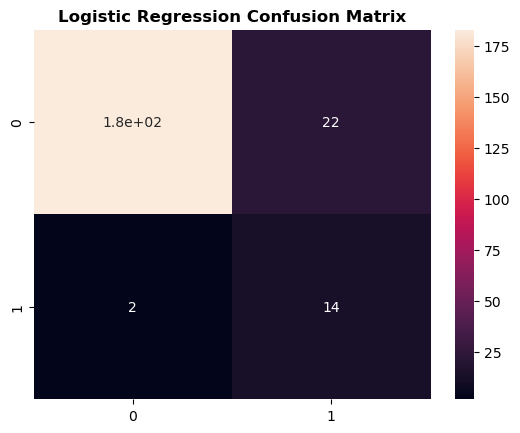

In [43]:
# Generate a confusion matrix

cm = confusion_matrix(test_pred, y_test)
sns.heatmap(cm, annot=True)
plt.title("Logistic Regression Confusion Matrix", fontweight='bold')

plt.savefig("files/Logistic Regression Confusion Matrix.png")

In [44]:
# Generate a classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       185
           1       0.88      0.39      0.54        36

    accuracy                           0.89       221
   macro avg       0.88      0.69      0.74       221
weighted avg       0.89      0.89      0.87       221



# Train and Evaluate a Support Vector Machine

In [45]:
# Build the model and experiment with different parameter values

# Initialize the support vector machine
svm_model = SVC()

# Create a dictionary of parameter values to experiment with
params1 = dict(
    C = uniform(loc=0, scale=5),
    kernel = ['poly'],
    degree = [int(x) for x in np.linspace(start = 2, stop = 10, num = 8)]
)
params2 = dict(
    C = uniform(loc=0, scale=100),
    kernel = ['rbf'],
    gamma = uniform(loc=0, scale=5),
)
all_params = [params1, params2]

# Set the number of iterations the search object will be run
n_iter=50

# Search for the best parameter combination
clf = RandomizedSearchCV(svm_model, all_params, n_iter=n_iter, scoring = 'roc_auc')
search = clf.fit(x_train, y_train)
search.best_params_

{'C': 67.78200511402093, 'gamma': 0.0011413834440715531, 'kernel': 'rbf'}

In [46]:
search.best_score_

0.8284657236216928

In [47]:
# Train the model across the different cross-validation folds

# Parameter values
C = search.best_params_['C']
kernel = search.best_params_['kernel']

fold = 1
SVM_AUCs = []

for train_idx, val_idx in skf.split(x_train, y_train):
    # Create training data
    X_tr = x_train[train_idx]
    y_tr = y_train[train_idx]
    
    # Create validation data
    X_val = x_train[val_idx]
    y_val = y_train[val_idx]
    
    # Fit the model on the training data
    if 'gamma' in search.best_params_:
        gamma = search.best_params_['gamma']
        model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True)
        model.fit(X_tr, y_tr)
        
    elif 'degree' in search.best_params_:
        degree = search.best_params_['degree']
        model = SVC(C=C, degree=degree, kernel=kernel, probability=True)
        model.fit(X_tr, y_tr)
    
    # Perform predictions on the validation data
    pred = model.predict(X_val)
    pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Measure the model's performance
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_proba)
    
    print(f"========== Fold {fold} ==========")
    print(f"Accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    SVM_AUCs.append(auc_score)  # Save AUC scores for later analysis
    
mean_AUC = np.mean(SVM_AUCs)
print("\n============================================")
print(f"|| Overall validation AUC score is {mean_AUC:0.4f} ||")
print("============================================")

========== Fold 1 ==========
Accuracy on the validation set is 0.8800 and AUC is 0.7738
========== Fold 2 ==========
Accuracy on the validation set is 0.8800 and AUC is 0.8952
========== Fold 3 ==========
Accuracy on the validation set is 0.8960 and AUC is 0.8676
========== Fold 4 ==========
Accuracy on the validation set is 0.8720 and AUC is 0.7238
========== Fold 5 ==========
Accuracy on the validation set is 0.8800 and AUC is 0.8557
========== Fold 6 ==========
Accuracy on the validation set is 0.8400 and AUC is 0.7257
========== Fold 7 ==========
Accuracy on the validation set is 0.8480 and AUC is 0.6995
========== Fold 8 ==========
Accuracy on the validation set is 0.8720 and AUC is 0.8719
========== Fold 9 ==========
Accuracy on the validation set is 0.8560 and AUC is 0.8210
========== Fold 10 ==========
Accuracy on the validation set is 0.8710 and AUC is 0.9572

|| Overall validation AUC score is 0.8192 ||


In [48]:
SVM_AUCs

[0.7738095238095238,
 0.8952380952380952,
 0.8676190476190476,
 0.7238095238095239,
 0.8557142857142858,
 0.7257142857142858,
 0.6995238095238095,
 0.8719047619047618,
 0.8209706959706959,
 0.9572115384615385]

In [49]:
# Fit the model on the entire training set

if 'gamma' in search.best_params_:
    gamma = search.best_params_['gamma']
    svm_model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True)
    svm_model.fit(x_train, y_train)

elif 'degree' in search.best_params_:
    degree = search.best_params_['degree']
    svm_model = SVC(C=C, degree=degree, kernel=kernel, probability=True)
    svm_model.fit(x_train, y_train)

In [50]:
# Prepare the test set for analysis

y_test = test_set["Attrition"].to_numpy()
x_test = full_pipeline.fit_transform(test_set)
x_test.shape

(221, 50)

In [51]:
y_test.shape

(221,)

In [52]:
# Make predictions on the test set

test_pred = svm_model.predict(x_test)
test_pred_proba = svm_model.predict_proba(x_test)[:, 1]

# Measure the model's performance
svm_acc_score = accuracy_score(y_test, test_pred)
svm_auc_score = roc_auc_score(y_test, test_pred_proba)

print(f"Model's test set accuracy: {100 * svm_acc_score:0.4f} %")
print(f"Model's test set AUC score: {svm_auc_score:0.4f}")

Model's test set accuracy: 88.2353 %
Model's test set AUC score: 0.8694


Text(0.5, 1.0, 'Support Vector Machine \nConfusion Matrix')

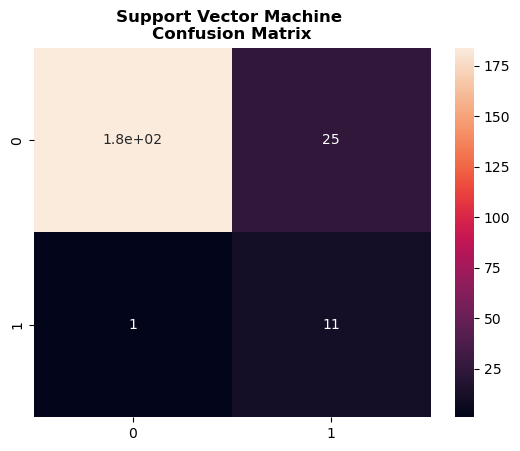

In [53]:
# Generate a confusion matrix

cm = confusion_matrix(test_pred, y_test)
sns.heatmap(cm, annot=True)
plt.title("Support Vector Machine \nConfusion Matrix", fontweight='bold')

In [54]:
# Generate a classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       185
           1       0.92      0.31      0.46        36

    accuracy                           0.88       221
   macro avg       0.90      0.65      0.70       221
weighted avg       0.89      0.88      0.86       221



# Train and Evaluate a Random Forest Classifier

In [55]:
# Build the model and experiment with different parameter values

# Initialize the random forest classifier
randf_model = RandomForestClassifier()

# Create a dictionary of parameter values to experiment with
params = dict(
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
    criterion = ['gini', 'entropy'],
    max_depth = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)],
    min_samples_split = [10, 50, 100]
)

# Set the number of iterations the search object will be run
# n_iter=50

# Search for the best parameter combination
clf = RandomizedSearchCV(randf_model, params, scoring = 'roc_auc')
search = clf.fit(x_train, y_train)
search.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'max_depth': 50,
 'criterion': 'entropy'}

In [56]:
search.best_score_

0.8061889285297502

In [57]:
# Train the model across the different cross-validation folds

# Parameter values
n_estimators = search.best_params_['n_estimators']
min_samples_split = search.best_params_['min_samples_split']
max_depth = search.best_params_['max_depth']
criterion = search.best_params_['criterion']

fold = 1
randf_AUCs = []

for train_idx, val_idx in skf.split(x_train, y_train):
    # Create training data
    X_tr = x_train[train_idx]
    y_tr = y_train[train_idx]
    
    # Create validation data
    X_val = x_train[val_idx]
    y_val = y_train[val_idx]
    
    # Fit the model on the training data
    model = RandomForestClassifier(n_estimators, min_samples_split=min_samples_split,
                                   max_depth=max_depth, criterion=criterion)
    model.fit(X_tr, y_tr)
    
    # Perform predictions on the validation data
    pred = model.predict(X_val)
    pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Measure the model's performance
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_proba)
    
    print(f"========== Fold {fold} ==========")
    print(f"Accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    randf_AUCs.append(auc_score)  # Save AUC scores for later analysis
    
mean_AUC = np.mean(randf_AUCs)
print("\n============================================")
print(f"|| Overall validation AUC score is {mean_AUC:0.4f} ||")
print("============================================")

========== Fold 1 ==========
Accuracy on the validation set is 0.8640 and AUC is 0.7662
========== Fold 2 ==========
Accuracy on the validation set is 0.8720 and AUC is 0.9148
========== Fold 3 ==========
Accuracy on the validation set is 0.8560 and AUC is 0.7943
========== Fold 4 ==========
Accuracy on the validation set is 0.8560 and AUC is 0.6581
========== Fold 5 ==========
Accuracy on the validation set is 0.8480 and AUC is 0.7610
========== Fold 6 ==========
Accuracy on the validation set is 0.8400 and AUC is 0.7671
========== Fold 7 ==========
Accuracy on the validation set is 0.8640 and AUC is 0.7510
========== Fold 8 ==========
Accuracy on the validation set is 0.8560 and AUC is 0.8476
========== Fold 9 ==========
Accuracy on the validation set is 0.8320 and AUC is 0.7889
========== Fold 10 ==========
Accuracy on the validation set is 0.8468 and AUC is 0.9481

|| Overall validation AUC score is 0.7997 ||


In [58]:
randf_AUCs

[0.7661904761904762,
 0.9147619047619048,
 0.7942857142857143,
 0.6580952380952381,
 0.7609523809523809,
 0.7671428571428571,
 0.7509523809523809,
 0.8476190476190476,
 0.7889194139194139,
 0.948076923076923]

In [59]:
# Fit the model on the entire training set

randf_model = RandomForestClassifier(n_estimators, min_samples_split=min_samples_split,
                               max_depth=max_depth, criterion=criterion)
randf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=10,
                       n_estimators=500)

In [60]:
# Prepare the test set for analysis

y_test = test_set["Attrition"].to_numpy()
x_test = full_pipeline.fit_transform(test_set)
x_test.shape

(221, 50)

In [61]:
y_test.shape

(221,)

In [62]:
# Make predictions on the test set

test_pred = randf_model.predict(x_test)
test_pred_proba = randf_model.predict_proba(x_test)[:, 1]

# Measure the model's performance
randf_acc_score = accuracy_score(y_test, test_pred)
randf_auc_score = roc_auc_score(y_test, test_pred_proba)

print(f"Model's test set accuracy: {100 * randf_acc_score:0.4f} %")
print(f"Model's test set AUC score: {randf_auc_score:0.4f}")

Model's test set accuracy: 85.9729 %
Model's test set AUC score: 0.8542


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

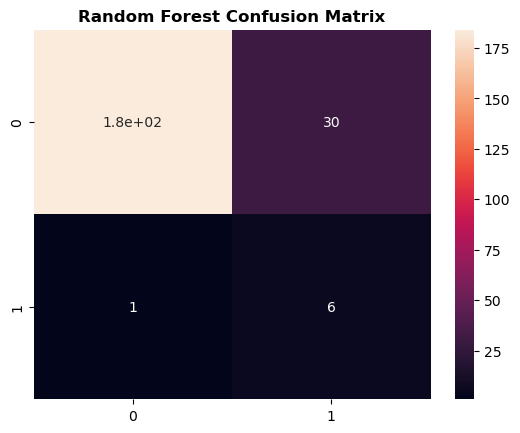

In [63]:
# Generate a confusion matrix

cm = confusion_matrix(test_pred, y_test)
sns.heatmap(cm, annot=True)
plt.title("Random Forest Confusion Matrix", fontweight='bold')

In [64]:
# Generate a classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       185
           1       0.86      0.17      0.28        36

    accuracy                           0.86       221
   macro avg       0.86      0.58      0.60       221
weighted avg       0.86      0.86      0.82       221



# Train and Evaluate a Deep Learning Model

In [65]:
# Train the model across the different cross-validation folds

fold = 1
deepL_AUCs = []

epochs = 5
batch_size=20

for train_idx, val_idx in skf.split(x_train, y_train):
    # Create training data
    X_tr = x_train[train_idx]
    y_tr = y_train[train_idx]
    
    # Create validation data
    X_val = x_train[val_idx]
    y_val = y_train[val_idx]
    
    # Build the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(50, )),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Fit the model on the training data
    epochs_hist = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, verbose=False)
    
    # Perform predictions on the validation data
    pred_proba = model.predict(X_val)
    pred = pred_proba > 0.5
    pred = [int(b) for b in pred]
    
    # Measure the model's performance
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_proba)
    
    print(f"========== Fold {fold} ==========")
    print(f"Accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")
    
    fold += 1
    deepL_AUCs.append(auc_score)  # Save AUC scores for later analysis
    
mean_AUC = np.mean(deepL_AUCs)
print("\n============================================")
print(f"|| Overall validation AUC score is {mean_AUC:0.4f} ||")
print("============================================")

4/4 [==============================] - 0s 4ms/step
========== Fold 1 ==========
Accuracy on the validation set is 0.8240 and AUC is 0.8090
4/4 [==============================] - 0s 5ms/step
========== Fold 2 ==========
Accuracy on the validation set is 0.8800 and AUC is 0.8157
4/4 [==============================] - 0s 3ms/step
========== Fold 3 ==========
Accuracy on the validation set is 0.8480 and AUC is 0.8438
4/4 [==============================] - 0s 2ms/step
========== Fold 4 ==========
Accuracy on the validation set is 0.8640 and AUC is 0.7643
4/4 [==============================] - 0s 5ms/step
========== Fold 5 ==========
Accuracy on the validation set is 0.8800 and AUC is 0.8224
4/4 [==============================] - 0s 5ms/step
========== Fold 6 ==========
Accuracy on the validation set is 0.8160 and AUC is 0.6252
4/4 [==============================] - 0s 3ms/step
========== Fold 7 ==========
Accuracy on the validation set is 0.8560 and AUC is 0.7190
4/4 [======================

In [66]:
deepL_AUCs

[0.809047619047619,
 0.8157142857142858,
 0.8438095238095238,
 0.7642857142857142,
 0.8223809523809524,
 0.6252380952380951,
 0.719047619047619,
 0.8619047619047618,
 0.8012820512820512,
 0.9552884615384615]

In [67]:
# Create train and validation sets

x_train_dl, x_val, y_train_dl, y_val = train_test_split(x_train, y_train, test_size=0.15, stratify=y_train)
x_train_dl.shape

(1061, 50)

In [68]:
# Fit the model on the entire training set

# Build the model
dl_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(50, )),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

dl_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               6528      
                                                                 
 dense_51 (Dense)            (None, 256)               33024     
                                                                 
 dense_52 (Dense)            (None, 128)               32896     
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 1)                 65        
                                                                 
Total params: 80769 (315.50 KB)
Trainable params: 80769 (315.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
dl_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 5
batch_size=20

# Train the model
epochs_hist = dl_model.fit(x_train_dl, y_train_dl, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/5
54/54 [==============================] - 2s 9ms/step - loss: 0.4378 - accuracy: 0.8285 - val_loss: 0.3831 - val_accuracy: 0.8404
Epoch 2/5
54/54 [==============================] - 0s 5ms/step - loss: 0.3522 - accuracy: 0.8539 - val_loss: 0.3515 - val_accuracy: 0.8617
Epoch 3/5
54/54 [==============================] - 0s 4ms/step - loss: 0.3225 - accuracy: 0.8746 - val_loss: 0.3398 - val_accuracy: 0.8670
Epoch 4/5
54/54 [==============================] - 0s 4ms/step - loss: 0.2842 - accuracy: 0.8916 - val_loss: 0.3776 - val_accuracy: 0.8298
Epoch 5/5
54/54 [==============================] - 0s 4ms/step - loss: 0.2609 - accuracy: 0.9095 - val_loss: 0.3703 - val_accuracy: 0.8564


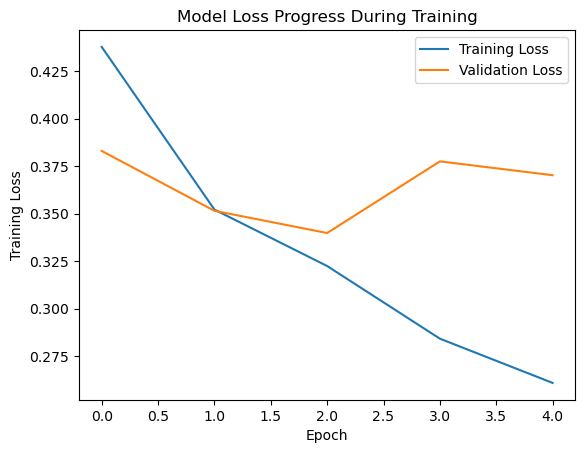

In [70]:
# Visualize the model loss progress

plt.plot(epochs_hist.history["loss"], label="Training Loss")
plt.plot(epochs_hist.history["val_loss"], label="Validation Loss")
plt.title("Model Loss Progress During Training")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()

plt.savefig("files/DL training loss.png")

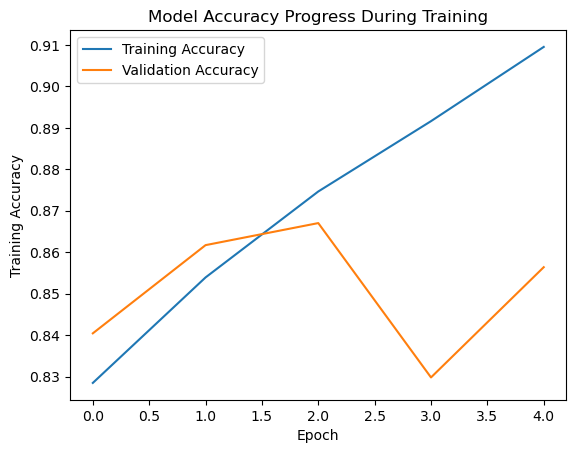

In [71]:
# Visualize the model accuracy progress

plt.plot(epochs_hist.history["accuracy"], label="Training Accuracy")
plt.plot(epochs_hist.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy Progress During Training")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.legend()

In [72]:
# Prepare the test set for analysis

y_test = test_set["Attrition"].to_numpy()
x_test = full_pipeline.fit_transform(test_set)
x_test.shape

(221, 50)

In [73]:
x_test.shape

(221, 50)

In [74]:
# Make predictions on the test set

test_pred_proba = dl_model.predict(x_test)
test_pred = test_pred_proba > 0.5
test_pred = [int(b) for b in test_pred]

# Measure the model's performance
deepL_acc_score = accuracy_score(y_test, test_pred)
deepL_auc_score = roc_auc_score(y_test, test_pred_proba)

print(f"Model's test set accuracy: {100 * deepL_acc_score:0.4f} %")
print(f"Model's test set AUC score: {deepL_auc_score:0.4f}")

7/7 [==============================] - 0s 3ms/step
Model's test set accuracy: 88.2353 %
Model's test set AUC score: 0.8812


Text(0.5, 1.0, 'Deep Learning Confusion Matrix')

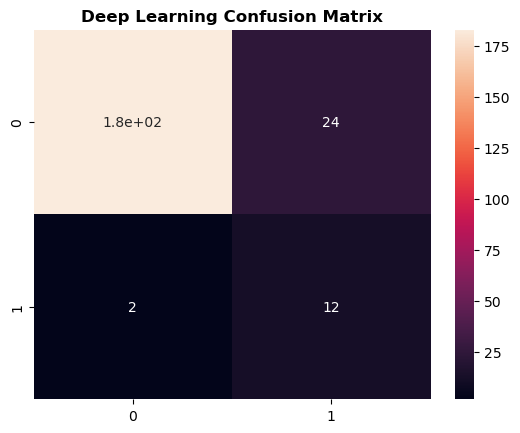

In [75]:
# Generate a confusion matrix

cm = confusion_matrix(test_pred, y_test)
sns.heatmap(cm, annot=True)
plt.title("Deep Learning Confusion Matrix", fontweight='bold')

In [76]:
# Generate a classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       185
           1       0.86      0.33      0.48        36

    accuracy                           0.88       221
   macro avg       0.87      0.66      0.71       221
weighted avg       0.88      0.88      0.86       221



# Compare the Models

In [77]:
# Create a dataframe of cross-validation AUC scores

auc_scores_df = pd.DataFrame({
    "Logistic Regression": logistic_AUCs,
    "Support Vector Machine": SVM_AUCs,
    "Random Forest": randf_AUCs,
    "Deep Learning": deepL_AUCs,
})
auc_scores_df

,Logistic Regression,Support Vector Machine,Random Forest,Deep Learning
0,0.785238,0.773810,0.766190,0.809048
1,0.889524,0.895238,0.914762,0.815714
2,0.878571,0.867619,0.794286,0.843810
3,0.737143,0.723810,0.658095,0.764286
4,0.862857,0.855714,0.760952,0.822381
5,0.726190,0.725714,0.767143,0.625238
6,0.703333,0.699524,0.750952,0.719048
7,0.868571,0.871905,0.847619,0.861905
8,0.837912,0.820971,0.788919,0.801282
9,0.956250,0.957212,0.948077,0.955288


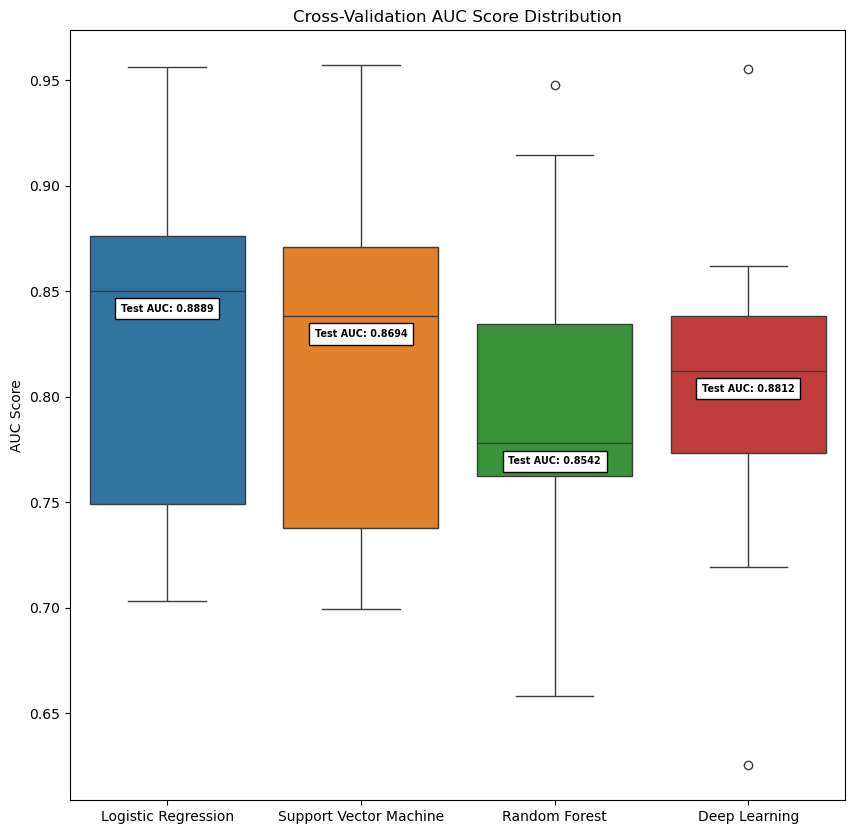

In [78]:
# Compare the distributions of the models cross-validation AUC scores

test_AUCs = [log_auc_score, svm_auc_score, randf_auc_score, deepL_auc_score]

plt.figure(figsize=(10, 10))
boxplot = sns.boxplot(auc_scores_df)

# Annotate the test set AUC score on the box plot
for xtick in boxplot.get_xticks():
    boxplot.text(xtick,
                 auc_scores_df.iloc[:, xtick].median() - 0.01,
                 f"Test AUC: {test_AUCs[xtick]:0.4f}",
                 horizontalalignment='center',
                 size='x-small',
                 weight='semibold',
                 bbox=dict(facecolor='w'),
                )
    
plt.ylabel("AUC Score")
plt.title("Cross-Validation AUC Score Distribution")

plt.savefig("files/Model comparison.png")

In [79]:
# Compute ANOVA statistic to see if a significant difference in performance exists
f_oneway(auc_scores_df["Logistic Regression"],
         auc_scores_df["Support Vector Machine"],
         auc_scores_df["Random Forest"],
         auc_scores_df["Deep Learning"])

F_onewayResult(statistic=0.2133750617552787, pvalue=0.8864754255170151)

In [80]:
# Compute Tukey's HSD to see every pairwise comparison

result = tukey_hsd(auc_scores_df["Logistic Regression"],
                   auc_scores_df["Support Vector Machine"],
                   auc_scores_df["Random Forest"],
                   auc_scores_df["Deep Learning"])
print(result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.005     0.999    -0.097     0.108
 (0 - 2)      0.025     0.913    -0.077     0.127
 (0 - 3)      0.023     0.932    -0.080     0.125
 (1 - 0)     -0.005     0.999    -0.108     0.097
 (1 - 2)      0.019     0.956    -0.083     0.122
 (1 - 3)      0.017     0.968    -0.085     0.120
 (2 - 0)     -0.025     0.913    -0.127     0.077
 (2 - 1)     -0.019     0.956    -0.122     0.083
 (2 - 3)     -0.002     1.000    -0.104     0.100
 (3 - 0)     -0.023     0.932    -0.125     0.080
 (3 - 1)     -0.017     0.968    -0.120     0.085
 (3 - 2)      0.002     1.000    -0.100     0.104

